## Neural Networks (Deep Learning)

A family of algorithms known as *neural networks* has recently seen a revival under the name “deep learning.” While deep learning shows great promise in many machine learning applications, deep learning algorithms are often tailored very carefully to a specific use case. 

Here, we will only discuss some relatively simple methods, namely *multilayer perceptrons* for classification and regression, that can serve as a starting point for more involved deep learning methods. Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks.

### The Neural Network Model

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

Remember that the prediction by a linear regressor is given as:

    ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

In plain English, ŷ is a weighted sum of the input features x[0] to x[p], weighted by the learned coefficients w[0] to w[p]. We could visualize this graphically as shown.

In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

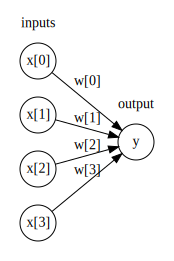

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

In this visualization of logistic regression:
- each node on the left represents an input features
- the connecting lines represent the learned coefficients
- the node on the right represents, the output, which is the weighted sum of the inputs

In an *MLP*, this process of computing weighted sums is repeated multiple times, first computing *hidden units* that represent an intermediate processing step, which are again combined using weighted sums to yield the final result.

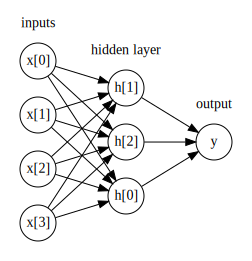

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

This model has a lot more coefficients (also called *weights*) to learn: there is one between every input and every hidden unit (which make up the hidden layer), and one between every unit in the hidden layer and the output.

Computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this model truly more powerful than a linear model, we need one extra trick. After computing a weighted sum for each hidden unit, a nonlinear function is applied to the result — usually the rectifying nonlinearity (also known as rectified linear unit or *relu*) or the tangens hyperbolicus (*tanh*). 

The result of this function is then used in the weighted sum that computes the output, ŷ. The two functions are visualized here. The *relu* cuts off values below zero, while *tanh* saturates to –1 for low input values and +1 for high input values. Either nonlinear function allows the neural network to learn much more complicated functions than a linear model could.

Text(0, 0.5, 'relu(x), tanh(x)')

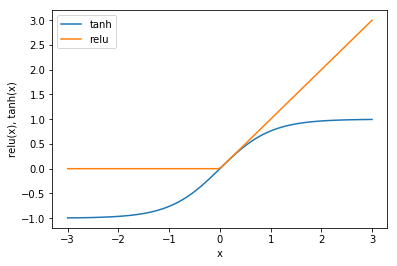

In [5]:
line = np.linspace(-3, 3, 100)

plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")

plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

For the small neural network pictured here, the full formula for computing ŷ in the case of regression would be (when using a tanh nonlinearity):

    h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[0])
    h[1] = tanh(w[0, 1] * x[0] + w[1, 1] * x[1] + w[2, 1] * x[2] + w[3, 1] * x[3] + b[1])
    h[2] = tanh(w[0, 2] * x[0] + w[1, 2] * x[1] + w[2, 2] * x[2] + w[3, 2] * x[3] + b[2])
    ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b

Here: 
- *w* are the weights between the input x and the hidden layer h
- *v* are the weights between the hidden layer h and the output ŷ. 

The weights v and w are learned from data, x are the input features, ŷ is the computed output, and h are intermediate computations. 

An important parameter that needs to be set by the user is the number of nodes in the hidden layer. This can be as small as 10 for very small or simple datasets and as big as 10,000 for very complex data. It is also possible to add additional hidden layers, as shown here:

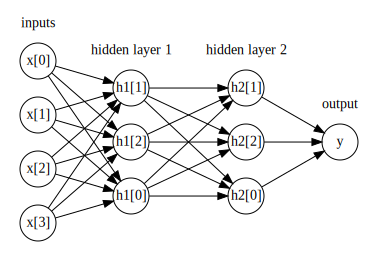

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

Having large neural networks made up of many of these layers of computation is what inspired the term *deep learning*.

### Tuning Neural Networks

Now, we'll look into the workings of the MLP by applying the *MLPClassifier* to the *two_moons* dataset we used earlier.

Text(0, 0.5, 'Feature 1')

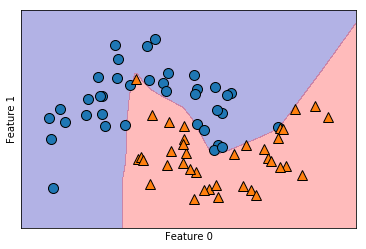

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

As we can see, the neural network learned a very nonlinear but relatively smooth decision boundary.

By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset.  We can reduce the number (which reduces the complexity of the model) and still get a good result.

Text(0, 0.5, 'Feature 1')

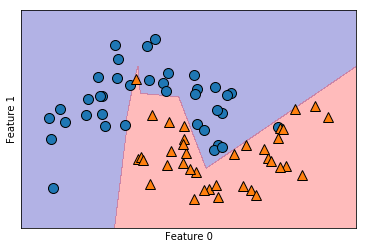

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

With only 10 hidden units, the decision boundary looks somewhat more ragged.  The default nonlinearity is *relu*.  With a single hidden layer, this means that the decision function will be made up of 10 straight line segments.

If we want a smoother decision boundary, we could add more hidden units, add a second hidden layer, or use the *tanh* nonlinearity.

Text(0, 0.5, 'Feature 1')

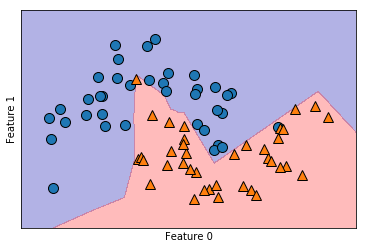

In [10]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

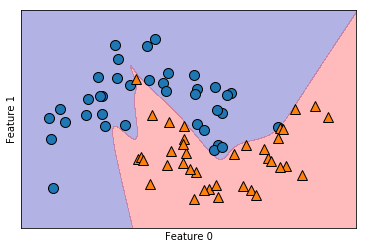

In [11]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")